# Classify Age Group of Abalones

1. Load data and describe data.
2. Split data to train, test and validation dataset (in case of data snooping).
3. Train common classification model, like KNN, Decision Tree, Random Forest, SVM and find the best one.
4. Plot to show the results

# Abstract

Here I  apply most supervised classification models to the abalones dataset and predict the age as young,medium or old. I also use most common classification models such as K-Nearest-Neighbor (KNN), Decision Tree, Random Forest and Support Vector Machines (SVM). My work involves applying pre-processing techniques to the data, splitting the data into training and testing data, splitting training data in validation and hyper-parameter data, applying cross validation techniques and finding the best tuning parameters for different models. Finally, I apply my best model to the testing data and get accuracy which validates my results. The best model of this data set is Random Forest.

# Data Pre-processing

In [192]:
#import  required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
#Reading the data

data = pd.read_csv('D:\DATA SC_Practice Project\\p2\\abalone.csv')
print("Total Number of samples: %d" % len(data))
data.head(5)

Total Number of samples: 4177


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [194]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Here we can see the sample of the raw data

In [195]:
#Data description
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


satistical description of the data

In [196]:
#check for  null values
data.isna().sum() 

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [197]:
 #check the datatypes of each column in data
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [198]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [199]:
data['Sex']

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

In [200]:
data1 = data.copy()
Rings = []
for i in data1["Rings"]:
    if i < 9.33:
        Rings.append("young")
    if i > 9.33 and i< 18.66 :
        Rings.append("medium")
    if i > 18.66:
        Rings.append("old")
data1["Rings"] = Rings

In [201]:
data1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,medium
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,young
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,young
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,medium
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,young
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,medium
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,medium
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,young
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,medium


In [204]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [205]:
data1['Sex'] = lab_enc.fit_transform(data1['Sex'])

In [206]:
data1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,medium
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,young
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,young
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,medium
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,young
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,medium
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,medium
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,young
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,medium


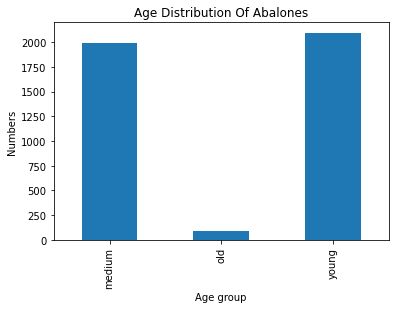

In [207]:
age_group = data1.groupby('Rings').Rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()

# Split Data and Train Model

In [208]:
X = data1.drop(['Rings'], axis = 1)
Y = data1['Rings']

In [209]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [210]:
Y

0       medium
1        young
2        young
3       medium
4        young
         ...  
4172    medium
4173    medium
4174     young
4175    medium
4176    medium
Name: Rings, Length: 4177, dtype: object

In [211]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25, random_state=41)

In [212]:
y_train

3937    medium
525      young
3507    medium
4136     young
3456    medium
         ...  
321      young
4066     young
3980     young
931      young
1984    medium
Name: Rings, Length: 3132, dtype: object

In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [214]:
from sklearn.neighbors import KNeighborsClassifier
parameters_knn = {'n_neighbors':range(1,50)}
clf_knn = GridSearchCV(KNeighborsClassifier(),parameters_knn, cv=10)

clf_knn.fit(x_train,y_train)
knn_model = clf_knn.best_estimator_
print(clf_knn.best_score_,clf_knn.best_params_)

0.7691581367900531 {'n_neighbors': 14}


In [215]:
from sklearn.tree import DecisionTreeClassifier
# use cross validation to get the best max_depth of decision tree
parameters_tree = {'max_depth':range(3,20)} 
clf_tree = GridSearchCV(DecisionTreeClassifier(), parameters_tree, cv=10)

clf_tree.fit(x_train,y_train)
tree_model = clf_tree.best_estimator_
print (clf_tree.best_score_, clf_tree.best_params_)

0.7506430475570298 {'max_depth': 5}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {'n_estimators': range(10,100,10),
                 'max_features': ["sqrt"],
                 'max_depth': range(2,30,2)} 
clf_rf = GridSearchCV(RandomForestClassifier(),parameters_rf,cv=5)

clf_rf.fit(x_train,y_train)
model_rf = clf_rf.best_estimator_
print(clf_rf.best_score_,clf_rf.best_params_)

In [ ]:
from sklearn.svm import SVC
parameters_svm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'C':[0.1,1,10],'gamma':[0.01,0.1,0.5,1,2]}

clf_svm = GridSearchCV(SVC(),parameters_svm,cv=5)

clf_svm.fit(x_train,y_train)
model_svm = clf_svm.best_estimator_
print(clf_svm.best_score_,clf_svm.best_params_)

# Random Forest

In [ ]:
prediction = clf_rf.predict(x_train)
print("Prediction Accuracy (Random Forest):",metrics.accuracy_score(prediction,y_train))

In [ ]:
# More exploration of Random Forest
# Show the importance of each feature
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
clf = RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=30)
clf.fit(x_train, y_train)

imp = pd.DataFrame(clf.feature_importances_).reset_index()
imp['index'] = data.columns.values[:-1]
imp.columns=['index','importance']
order = imp.sort_values('importance',ascending = False)['index'].values
fig = plt.subplots(figsize=(11.7, 8.27))# a4 size
sns.barplot(data=imp,x='index',y='importance',order = order,palette="Reds_d")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
pip install scikit-plot


In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a RandomForest classifier. We'll generate probabilities on the test set.
model_rf.fit(x_train, y_train)
probas = model_rf.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

In [ ]:
import pickle
#writing different model files to file
with open ('modelForPrediction.sav','wb') as f:
    pickle.dump(model_rf,f)